ejercicio 1
Atenúa el ruido en la imagen ruido.jpg tal cual se ve en el ejemplo con python y jupiter 


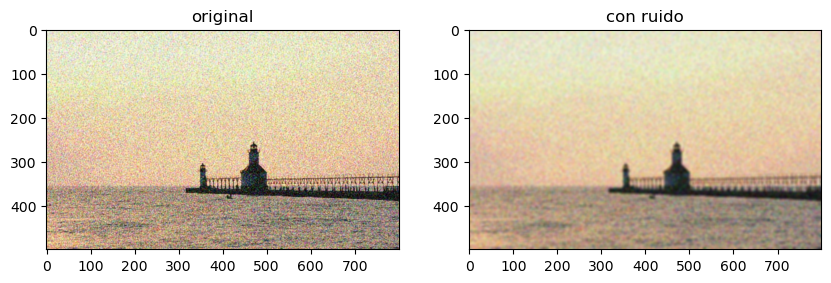

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('ruido.jpg')

denoised_image = cv2.GaussianBlur(image, (9, 9), 3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title('con ruido')
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))

plt.show()

ejercicio 2


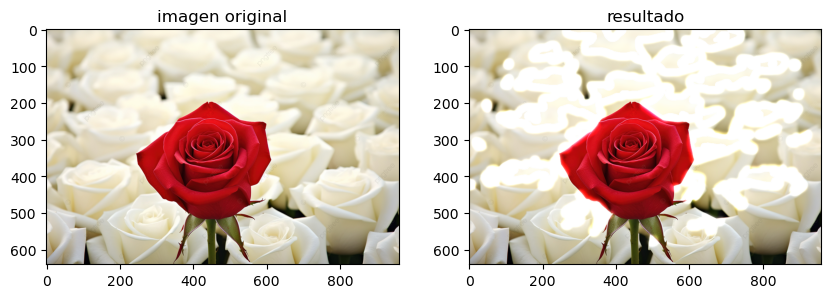

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


image = cv2.imread('rosa.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=1)
mask = cv2.erode(mask, kernel, iterations=1)

mask = cv2.GaussianBlur(mask, (21, 21), 0)

mask_inv = cv2.bitwise_not(mask)

rose_foreground = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
background = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_inv)

background_blurred = cv2.GaussianBlur(background, (21, 21), 0)

result = cv2.add(rose_foreground, background_blurred)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('imagen original')
plt.imshow(image_rgb)

plt.subplot(1, 2, 2)
plt.title('resultado')
plt.imshow(result)

plt.show()


ejercicio 3


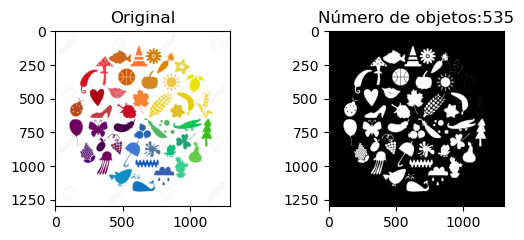

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure as ms

def counter_2(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,binary = cv2.threshold(img_gris, 200, 255, cv2.THRESH_BINARY_INV)
    target=ms.label(binary,connectivity=2)
    cont = np.max(target)
    return cont,binary

imagen = cv2.imread('elementos.jpg')

img_zone=imagen[1:1000,1:300,:] 

img_count,binary = counter_2(imagen)

plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(2, 3, 2)
plt.title(f'Número de objetos:{img_count}')
plt.imshow(cv2.cvtColor(binary, cv2.COLOR_BGR2RGB))

plt.show()

ejercicio 4